COGNIFYZ TECHNOLOGIES



LEVEL 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset  (1).csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
stats = df.describe()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
# The number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print(df.head())


Number of rows: 9551
Number of columns: 21
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

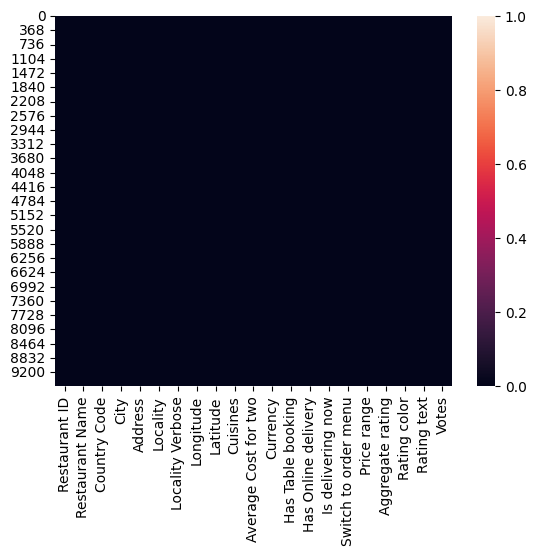

In [9]:
sns.heatmap(df.isnull())

In [10]:
#check for duplicates
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [11]:
# Analyzing the distribution of the target variable
rating_distribution = df['Aggregate rating'].value_counts()
print("Distribution of Aggregate ratings:")
print(rating_distribution)

Distribution of Aggregate ratings:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


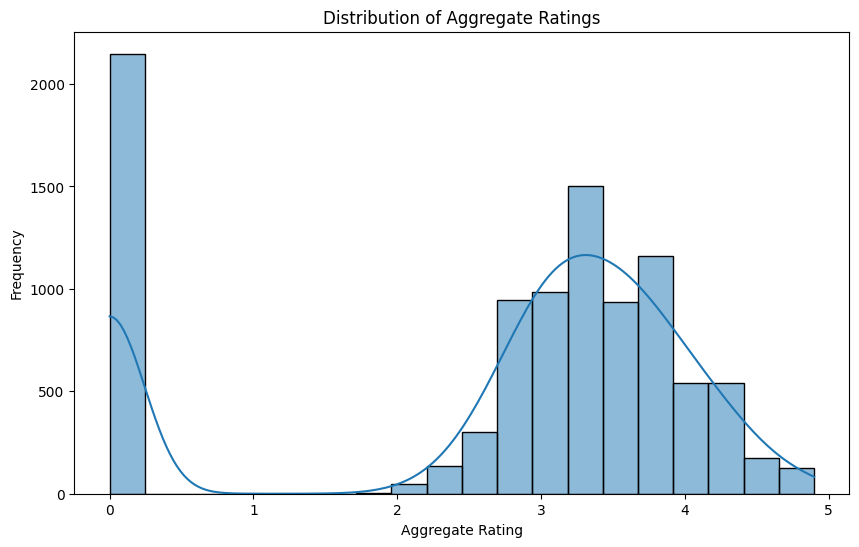

In [12]:
#vizualizig the distribution above
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
# The distribution of categorical variables
country_distribution = df['Country Code'].value_counts()
city_distribution = df['City'].value_counts()
cuisine_distribution = df['Cuisines'].value_counts()


In [14]:
print("Basic Statistical Measures for Numerical Columns:")
print(stats)
print("\nDistribution of Country Codes:")
print(country_distribution)
print("\nDistribution of Cities:")
print(city_distribution)
print("\nDistribution of Cuisines:")

Basic Statistical Measures for Numerical Columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000 

In [15]:
# The top cuisines and cities with the highest number of restaurants
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cities = df['City'].value_counts().head(10)

In [16]:
print(cuisine_distribution)
print("\nTop 10 Cuisines:")
print(top_cuisines)
print("\nTop 10 Cities with the Highest Number of Restaurants:")

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

Top 10 Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                   

In [17]:
import folium

In [18]:
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()])
map

In [19]:
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=6)

for i, row in df.sample(15).iterrows():
     folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map)

map

In [44]:
#The distribution of restaurants across different cities or countries
city_distribution = df['City'].value_counts()
country_distribution = df['Country Code'].value_counts()

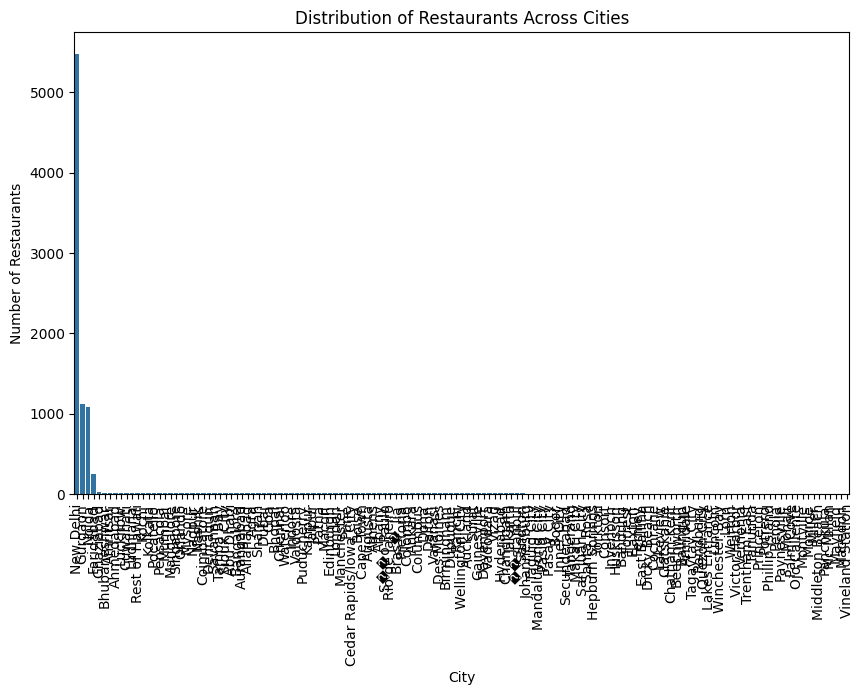

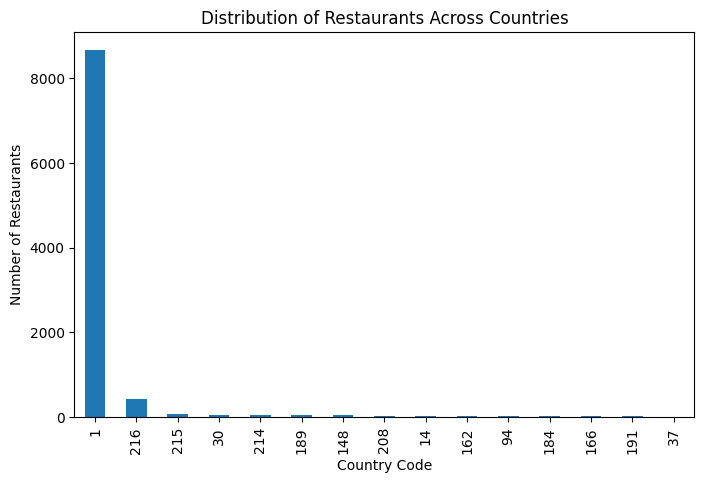

In [21]:
# Plotting distributions
plt.figure(figsize=(10, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values)
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 5))
country_distribution.plot(kind='bar')
plt.title('Distribution of Restaurants Across Countries')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()

In [22]:
# Determining if there is any correlation between the restaurant's location and its rating
correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


LEVEL 2

In [23]:

# Calculating the number of restaurants that offer table booking
htb = (df['Has Table booking'] == "Yes").sum()

#The percentage of restaurants that offer table booking
table_booking_percentage = (htb / len(df)) * 100



In [24]:
# Calculating the number of restaurants that offer online delivery
od = (df['Has Online delivery'] == "Yes").sum()

# the percentage of restaurants that offer online delivery
online_delivery_percentage = (od / len(df)) * 100

In [25]:
print("Percentage of restaurants that offer table booking: {:.2f}%".format(table_booking_percentage))
print("Percentage of restaurants that offer online delivery: {:.2f}%".format(online_delivery_percentage))

Percentage of restaurants that offer table booking: 12.12%
Percentage of restaurants that offer online delivery: 25.66%


In [26]:
# Comparing the average ratings of restaurants with table booking and those without
average_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()
print(average_rating_with_booking)
print(average_rating_without_booking)

3.4419689119170984
2.559358989634219


In [27]:
# Analyzing the availability of online delivery among restaurants with different price ranges
price_ranges = df['Price range'].unique()
online_delivery_by_price = {}
for price_range in price_ranges:
    online_delivery_by_price[price_range] = df[df['Price range'] == price_range]['Has Online delivery'].value_counts(normalize=True)

print("\nAvailability of online delivery by price range:")
for price_range, delivery_counts in online_delivery_by_price.items():
    print("\nPrice Range:", price_range)
    print(delivery_counts)


Availability of online delivery by price range:

Price Range: 3
Has Online delivery
No     0.708097
Yes    0.291903
Name: proportion, dtype: float64

Price Range: 4
Has Online delivery
No     0.909556
Yes    0.090444
Name: proportion, dtype: float64

Price Range: 2
Has Online delivery
No     0.586894
Yes    0.413106
Name: proportion, dtype: float64

Price Range: 1
Has Online delivery
No     0.842259
Yes    0.157741
Name: proportion, dtype: float64


In [28]:
#The most common price range among all the restaurants
most_common_price_range = df['Price range'].mode()[0]
print("Most common price range among all restaurants:", most_common_price_range)

Most common price range among all restaurants: 1


In [29]:
#The average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print(average_rating_by_price_range)

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [30]:
#Identify the color that represents the highest average rating among different price ranges
highest_avg_rating_color = average_rating_by_price_range.idxmax()

print("\nColor representing the highest average rating among different price ranges:", highest_avg_rating_color)


Color representing the highest average rating among different price ranges: 4


In [31]:
# Extract additional features
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

In [32]:
# Create new features by encoding categorical variables
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [33]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

LEVEL 3

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
# Selecting features and target variable
X = df[['Price range', 'Has Table booking', 'Has Online delivery']]
y = df['Aggregate rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("="*50)

Model: Linear Regression
Mean Squared Error: 1.74
R-squared: 0.23
Model: Decision Tree
Mean Squared Error: 1.69
R-squared: 0.26
Model: Random Forest
Mean Squared Error: 1.69
R-squared: 0.26


In [37]:
# Analyzing the relationship between cuisine type and restaurant rating
cuisine_rating_mean = df.groupby('Cuisines')['Aggregate rating'].mean()
print("Relationship between Cuisine Type and Restaurant Rating:")
print(cuisine_rating_mean)


Relationship between Cuisine Type and Restaurant Rating:
Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64


In [38]:
# Identifing the most popular cuisines based on the number of votes
cuisine_votes_sum = df.groupby('Cuisines')['Votes'].sum()
most_popular_cuisines = cuisine_votes_sum.nlargest(10)

print("Most Popular Cuisines based on Number of Votes:")
print(most_popular_cuisines)


Most Popular Cuisines based on Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


In [39]:
# Determining if there are any specific cuisines that tend to receive higher ratings
top_rated_cuisines = cuisine_rating_mean.nlargest(10)
print("Top Rated Cuisines:")
print(top_rated_cuisines)

Top Rated Cuisines:
Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
BBQ, Breakfast, Southern        4.9
Burger, Bar Food, Steak         4.9
Continental, Indian             4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
Name: Aggregate rating, dtype: float64


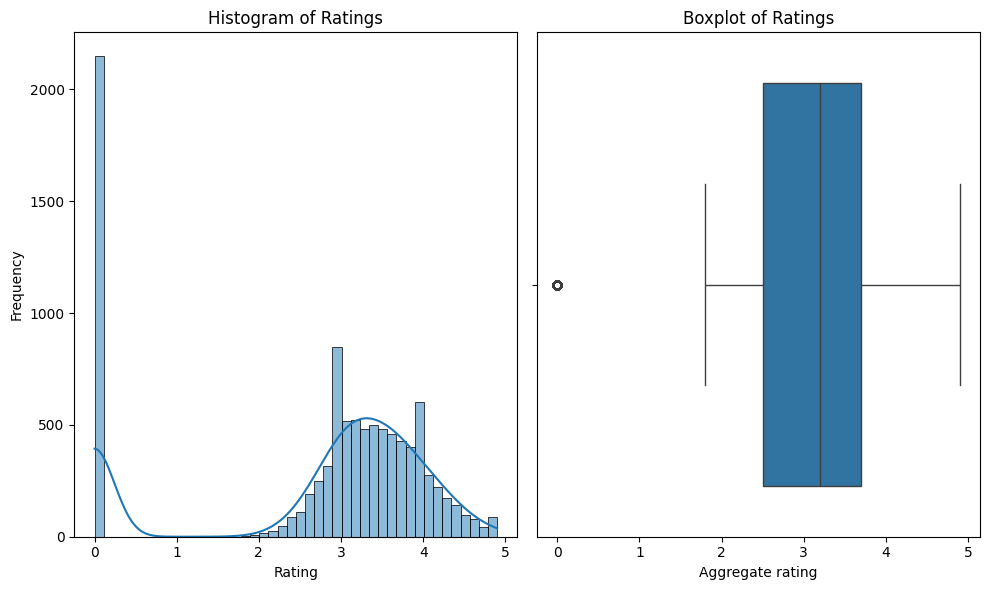

In [40]:
# Distribution of ratings using different charts
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Aggregate rating'], kde=True)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Aggregate rating'])
plt.title('Boxplot of Ratings')

plt.tight_layout()
plt.show()

<ipython-input-41-e784c32daf17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_cuisine.values, y=avg_rating_by_cuisine.index, palette='viridis')


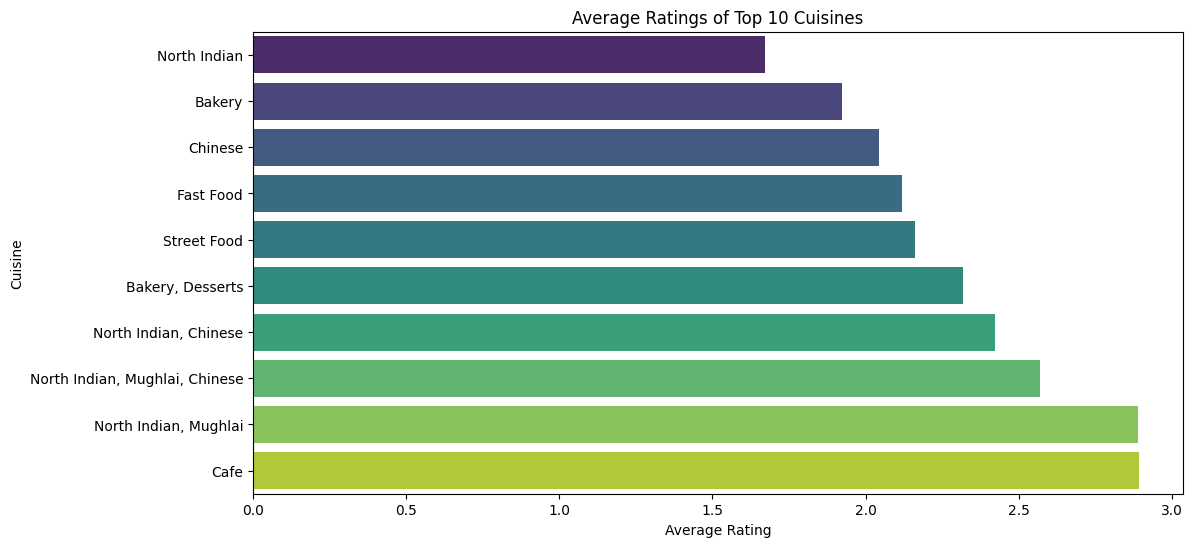

In [41]:

# Comparing average ratings of different cuisines using bar plot
top_cuisines = df['Cuisines'].value_counts().head(10).index
avg_rating_by_cuisine = df[df['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_cuisine.values, y=avg_rating_by_cuisine.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Average Ratings of Top 10 Cuisines')
plt.show()



<ipython-input-42-8ae34bb029b4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_city.values, y=avg_rating_by_city.index, palette='magma')


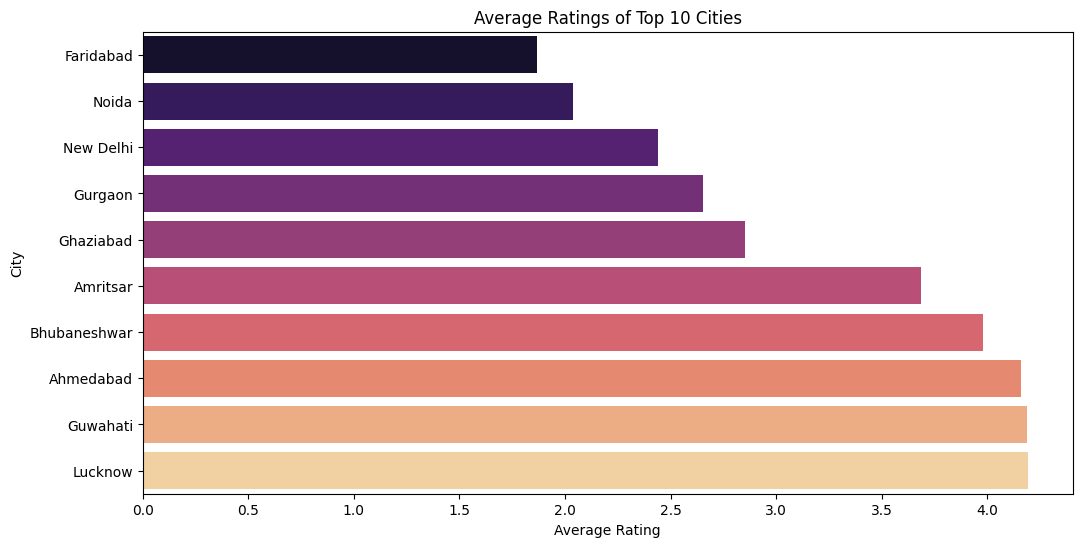

In [42]:
# Comparing average ratings of different cities using bar plot
top_cities = df['City'].value_counts().head(10).index
avg_rating_by_city = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_city.values, y=avg_rating_by_city.index, palette='magma')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.title('Average Ratings of Top 10 Cities')
plt.show()

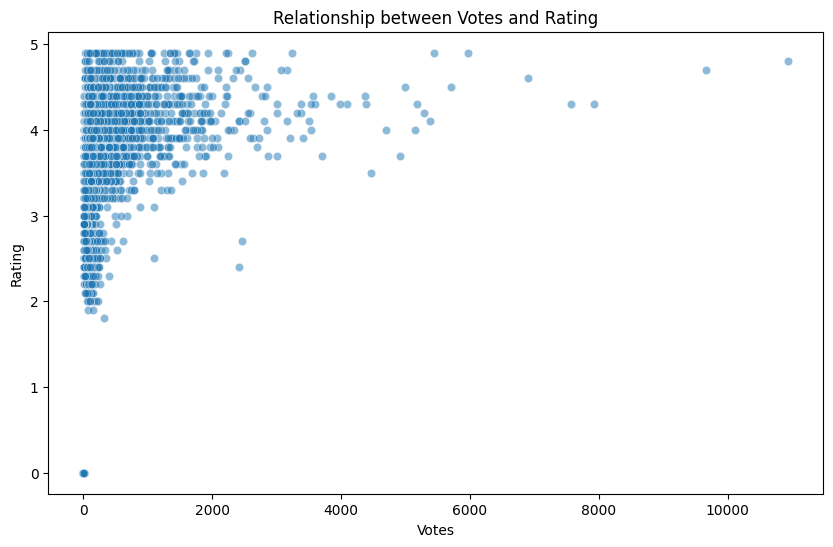

In [43]:
# Visualizing the relationship between features and target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.5)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Relationship between Votes and Rating')
plt.show()
